<a href="https://colab.research.google.com/github/DevAssis/dashboard_BI_Evolution/blob/master/4blue_dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Instalação das bibliotecas necessárias
!pip install pandas plotly seaborn

=== Dashboard BI - Visão Geral ===

KPIs Principais:
Tempo Médio de Conclusão: 90.00 dias
Projetos Ativos: 2
Grau de Confiabilidade: 6.89



<ipython-input-3-b09dd34e3652>:11: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.




Detalhes dos Projetos:


,nome,responsavel,status,prazo,progresso,prioridade
0,Análise Preditiva de Vendas,Ana Silva,Em Andamento,15/04/2024,75,Alta
1,Dashboard Financeiro,Carlos Santos,Concluído,01/03/2024,100,Média
2,Integração de Dados,Marina Costa,Em Andamento,30/04/2024,45,Alta
3,Automação de Relatórios,Pedro Oliveira,Atrasado,10/03/2024,60,Média


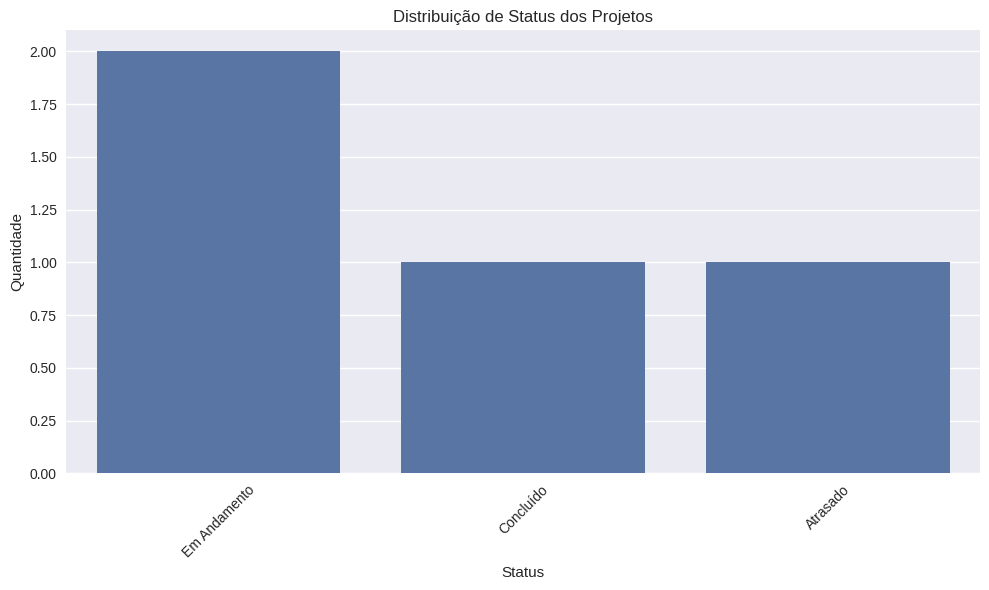

In [3]:
# Importando as bibliotecas
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Configuração para exibir gráficos no notebook
%matplotlib inline
plt.style.use('seaborn')

# Criando os dados de exemplo
# Dados de projetos mensais
project_data = pd.DataFrame({
    'month': ['Jul 2023', 'Ago 2023', 'Set 2023', 'Out 2023', 'Nov 2023', 'Dez 2023'],
    'concluded': [6, 7, 8, 9, 7, 8],
    'ongoing': [3, 4, 4, 5, 6, 4],
    'avgTime': [95, 93, 91.17, 89, 92, 90]
})

# Dados de confiabilidade
reliability_data = pd.DataFrame({
    'month': ['Jul 2023', 'Ago 2023', 'Set 2023', 'Out 2023', 'Nov 2023', 'Dez 2023'],
    'value': [6.21, 6.35, 6.42, 6.58, 6.75, 6.89],
    'target': [7.0, 7.0, 7.0, 7.0, 7.0, 7.0]
})

# Dados de projetos detalhados
detailed_projects = pd.DataFrame({
    'nome': ["Análise Preditiva de Vendas", "Dashboard Financeiro",
            "Integração de Dados", "Automação de Relatórios"],
    'responsavel': ["Ana Silva", "Carlos Santos", "Marina Costa", "Pedro Oliveira"],
    'status': ["Em Andamento", "Concluído", "Em Andamento", "Atrasado"],
    'prazo': ["15/04/2024", "01/03/2024", "30/04/2024", "10/03/2024"],
    'progresso': [75, 100, 45, 60],
    'prioridade': ["Alta", "Média", "Alta", "Média"]
})

# Dados de métricas de qualidade
quality_metrics = pd.DataFrame({
    'mes': ['Jul 2023', 'Ago 2023', 'Set 2023'],
    'bugs': [12, 10, 8],
    'resolucoes': [10, 9, 8],
    'satisfacao': [8.5, 8.7, 8.9]
})

# Funções para criar os gráficos
def plot_project_evolution():
    """Gráfico de evolução de projetos"""
    fig = go.Figure()
    fig.add_bar(name='Concluídos', x=project_data['month'], y=project_data['concluded'])
    fig.add_bar(name='Em Andamento', x=project_data['month'], y=project_data['ongoing'])
    fig.update_layout(
        title='Evolução de Projetos',
        xaxis_title='Mês',
        yaxis_title='Quantidade',
        barmode='group'
    )
    fig.show()

def plot_reliability():
    """Gráfico de confiabilidade vs meta"""
    fig = go.Figure()
    fig.add_scatter(name='Atual', x=reliability_data['month'],
                   y=reliability_data['value'], mode='lines+markers')
    fig.add_scatter(name='Meta', x=reliability_data['month'],
                   y=reliability_data['target'], mode='lines', line=dict(dash='dash'))
    fig.update_layout(
        title='Grau de Confiabilidade vs Meta',
        xaxis_title='Mês',
        yaxis_title='Valor'
    )
    fig.show()

def plot_project_status():
    """Gráfico de status dos projetos"""
    status_count = detailed_projects['status'].value_counts()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=status_count.index, y=status_count.values)
    plt.title('Distribuição de Status dos Projetos')
    plt.xlabel('Status')
    plt.ylabel('Quantidade')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_quality_metrics():
    """Gráfico de métricas de qualidade"""
    fig = go.Figure()
    fig.add_scatter(name='Bugs', x=quality_metrics['mes'],
                   y=quality_metrics['bugs'], mode='lines+markers')
    fig.add_scatter(name='Resoluções', x=quality_metrics['mes'],
                   y=quality_metrics['resolucoes'], mode='lines+markers')
    fig.add_scatter(name='Satisfação', x=quality_metrics['mes'],
                   y=quality_metrics['satisfacao'], mode='lines+markers')
    fig.update_layout(
        title='Métricas de Qualidade',
        xaxis_title='Mês',
        yaxis_title='Valor'
    )
    fig.show()

def show_project_details():
    """Exibe detalhes dos projetos em formato tabular"""
    return detailed_projects.style.background_gradient(subset=['progresso'], cmap='YlOrRd')

# Função principal para exibir o dashboard
def show_dashboard():
    print("=== Dashboard BI - Visão Geral ===\n")

    # KPIs principais
    print("KPIs Principais:")
    print(f"Tempo Médio de Conclusão: {project_data['avgTime'].iloc[-1]:.2f} dias")
    print(f"Projetos Ativos: {detailed_projects[detailed_projects['status'] == 'Em Andamento'].shape[0]}")
    print(f"Grau de Confiabilidade: {reliability_data['value'].iloc[-1]:.2f}\n")

    # Gráficos
    plot_project_evolution()
    plot_reliability()
    print("\nDetalhes dos Projetos:")
    display(show_project_details())
    plot_project_status()
    plot_quality_metrics()

# Executar o dashboard
show_dashboard()